### Uploading libraries

In [ ]:
library(dplyr)
require(ggplot2)
require(reshape2)
require(tidyverse)
library('ggplot2')
library('latex2exp')
library("gridExtra")

### Exercise 1

which color do you choose?[b][w][stop]b
which color do you choose?[b][w][stop]b
which color do you choose?[b][w][stop]b
which color do you choose?[b][w][stop]b
which color do you choose?[b][w][stop]b
which color do you choose?[b][w][stop]b
which color do you choose?[b][w][stop]b
which color do you choose?[b][w][stop]b
which color do you choose?[b][w][stop]w
which color do you choose?[b][w][stop]w
which color do you choose?[b][w][stop]w
which color do you choose?[b][w][stop]b
which color do you choose?[b][w][stop]b
which color do you choose?[b][w][stop]w
which color do you choose?[b][w][stop]b
which color do you choose?[b][w][stop]b
which color do you choose?[b][w][stop]w
which color do you choose?[b][w][stop]b
which color do you choose?[b][w][stop]w
which color do you choose?[b][w][stop]b
which color do you choose?[b][w][stop]b
which color do you choose?[b][w][stop]stop


h0,h1,h2,h3,h4,h5,x,color
0.1666667,0.1666667,0.16666667,0.1666666667,1.666667e-01,0.1666667,1,start
0.3333333,0.2666667,0.20000000,0.1333333333,6.666667e-02,0.0000000,2,b
0.4545455,0.2909091,0.16363636,0.0727272727,1.818182e-02,0.0000000,3,b
0.5555556,0.2844444,0.12000000,0.0355555556,4.444444e-03,0.0000000,4,b
0.6384065,0.2614913,0.08273749,0.0163432074,1.021450e-03,0.0000000,5,b
0.7062147,0.2314124,0.05491525,0.0072316384,2.259887e-04,0.0000000,6,b
0.7616378,0.1996588,0.03553497,0.0031196685,4.874482e-05,0.0000000,7,b
0.8068681,0.1692125,0.02258714,0.0013219726,1.032791e-05,0.0000000,8,b
0.8437208,0.1415529,0.01417127,0.0005529408,2.159925e-06,0.0000000,9,b
0.0000000,0.8250787,0.16520206,0.0096688908,5.035881e-05,0.0000000,10,w


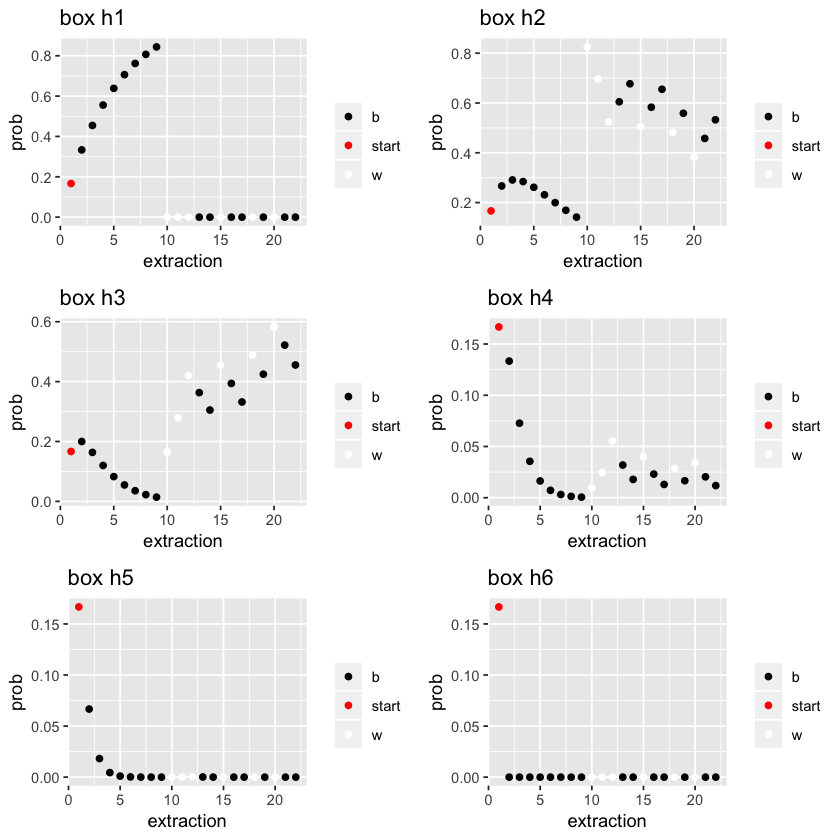

In [2]:
update <- function(k, j, c){
    p <- ifelse(c=='b', k*(5-j)/5, k*j/5)
    return(p)
  }
  
  
df <- data.frame('h0'=1/6, 'h1'=1/6, 'h2'=1/6, 'h3'=1/6, 'h4'=1/6, 'h5'=1/6)
colors<- c('start')
 
while((color <- readline("which color do you choose?[b][w][stop]"))!='stop') {
    
    v <-as.vector(unlist(mapply(update, 0:5, c=color, k=tail(df, 1))))
    norm <- sum(v)
    df <- (rbind(df, v/norm))
    colors <- append(colors, color)
}
  
  
df$x <- rownames(df)
df$color <- colors
df
df$x <- as.numeric(as.character(df$x))
sample <- df$x  


plots = lapply(1:6, function(i) ggplot() + geom_point(aes(x = sample, y = df[, i],  colour=df$color)) + 
   scale_colour_manual(values = c('start'="red", 'b'="black", 'w'="white")) +
   labs(colour='',title=sprintf('box h%.f', i),  x='extraction', y='prob')) 

do.call(grid.arrange,  plots)  

### Exercise 2

select a box number between 0 and 5   selected:4


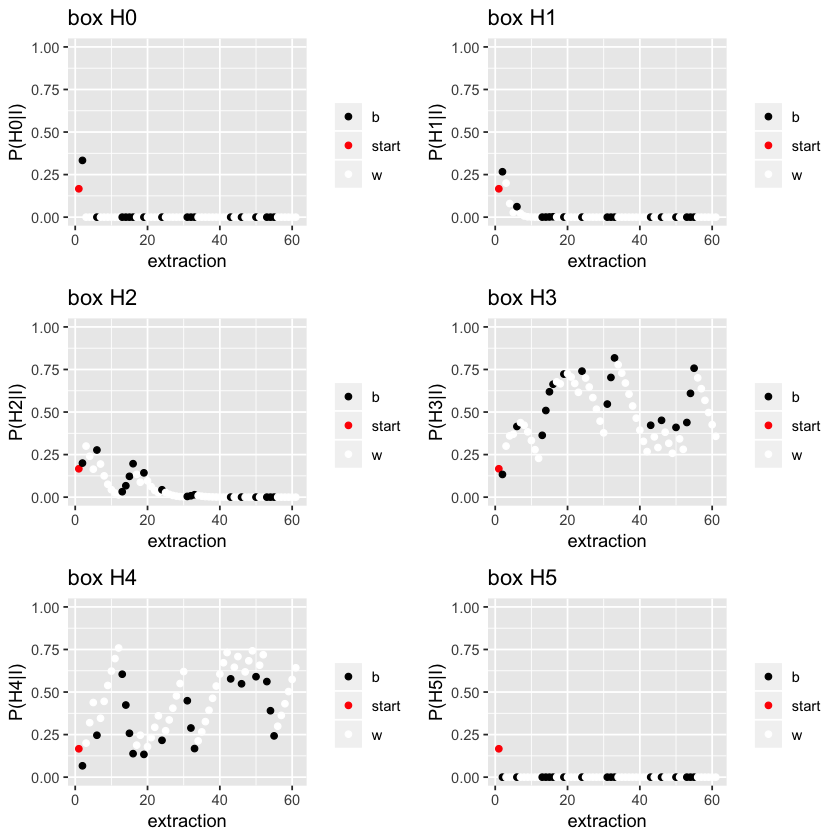

In [3]:
n_iteration = 60

i <- as.integer(readline('select a box number between 0 and 5   selected:'))
colour <- c('b', 'w')
x <- sample(colour, size=n_iteration, replace=TRUE, prob=c((5-i)/5, i/5))


df <- data.frame('h0'=1/6, 'h1'=1/6, 'h2'=1/6, 'h3'=1/6, 'h4'=1/6, 'h5'=1/6)
for (c in x) { 
    v <-as.vector(unlist(mapply(update, 0:5, c=c, k=tail(df, 1))))
    #print(tail(df, 1))
    
    norm <- sum(v)
    df <- (rbind(df, v/norm))

    
    
}

#df
x <- append(x, 'start', 0)
df$color <- x
df$x <- rownames(df)
df$x <- as.numeric(as.character(df$x))


sample <- df$x  
plots = lapply(1:6, function(i) ggplot() + geom_point(aes(x = sample, y = df[, i], colour=df$color))+ 
        scale_colour_manual(values = c('start'="red", 'b'="black", 'w'="white")) +
        ylim(0, 1) + 
   labs(colour='',title=sprintf('box H%.f', i-1),  x='extraction', y=sprintf('P(H%.f|I)', i-1)))

do.call(grid.arrange,  plots)

### Exercise 3

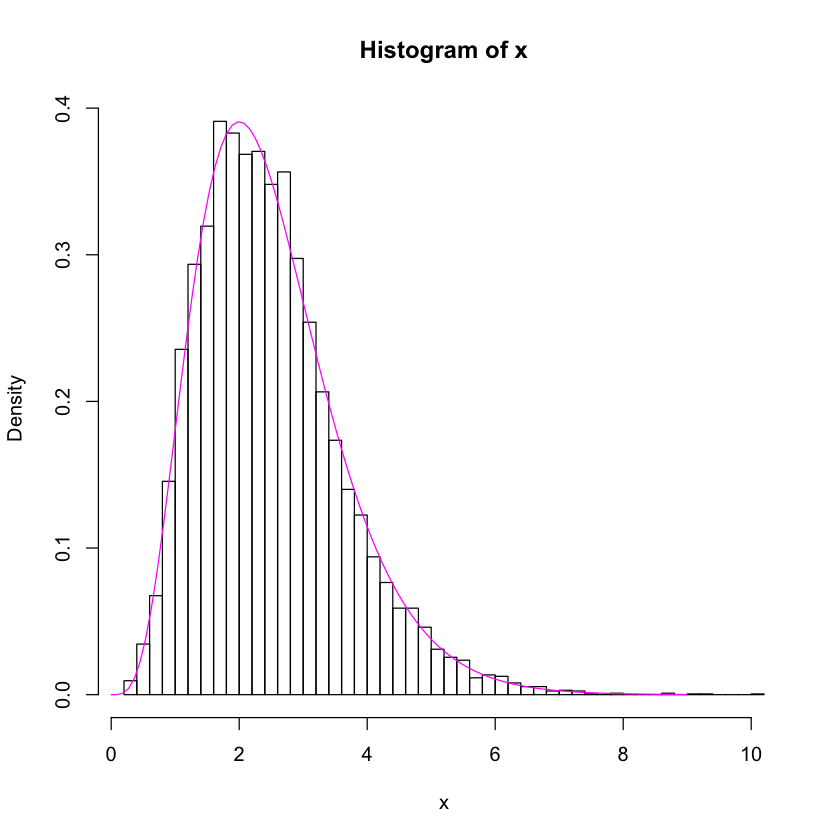

In [5]:
sampling<- function (m, beta, n) {
    m1 <- (matrix(runif(n*m), n, m))
    x <- apply(m1, 1, prod)
    y <- -1/beta*log(x)
    return(y)
}


beta = 2
m = 5
x <- sampling(m, beta, 10000)
hist(x, breaks=50, prob=TRUE)
curve(dgamma(x, rate=beta, shape=m),0,9, add=TRUE, col=6)

### Exercise 4
The following function generates N random numbers via the Von Neumann middle square algorithm

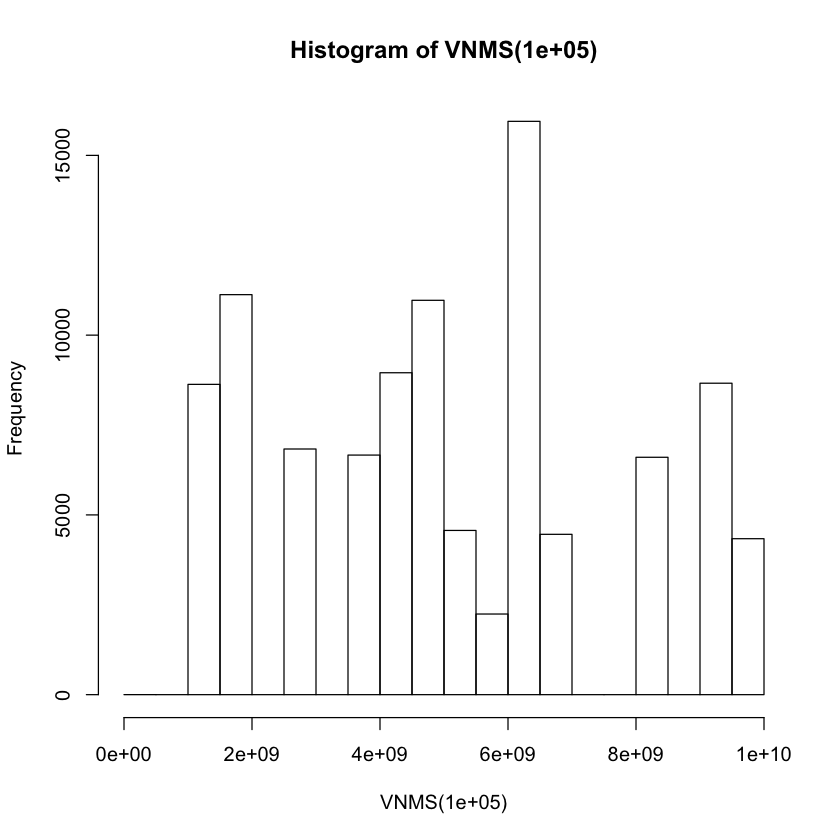

In [6]:
VNMS <- function(N) {
    
 numbers <- c()
    
 for (i in 1:N) {
     
      x <- sample(1:9, 10, replace=T)
      x.squared = x^2
      number <- unlist(strsplit(as.character(x.squared),""))
      len = length(number)
      slice = ceiling(len/2)
      vn = number[(slice-5):(slice+4)]
      random<-(as.numeric(paste(vn, collapse="")))
      numbers <- append(numbers, random)
     
  }  
  return(numbers)
    
}

hist(VNMS(100000))
